In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.climatestotravel.com/climate/united-states/texas'

In [3]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
tables = soup.find_all('table', {'class': 'cities'})

In [5]:
dfs = []

In [6]:
for i, table in enumerate(tables):

    df = pd.read_html(str(table))[0]
   
    dfs.append(df)
    

In [7]:
dfs_modified = []

for df in dfs:
    
    df_modified = df.iloc[:, [0, -1]]
    
    dfs_modified.append(df_modified)



In [8]:
df_concat = pd.concat(dfs_modified, ignore_index=True)

df_mean = df_concat.groupby('Month')['Mean (°F)'].mean().reset_index()
df_mean

,Month,Mean (°F)
0,April,69.028571
1,August,84.900000
2,December,52.200000
3,February,55.028571
4,January,50.928571
5,July,85.014286
6,June,82.842857
7,March,61.928571
8,May,76.528571
9,November,59.800000


In [9]:
new_df = df_mean.drop(index=12)
new_df

,Month,Mean (°F)
0,April,69.028571
1,August,84.900000
2,December,52.200000
3,February,55.028571
4,January,50.928571
5,July,85.014286
6,June,82.842857
7,March,61.928571
8,May,76.528571
9,November,59.800000


In [10]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df = new_df.sort_values(by='Month', key=lambda x: x.map(month_order.index))

df = df.reset_index(drop=True)

df
df.to_csv('Output/temp_month_texas.csv')

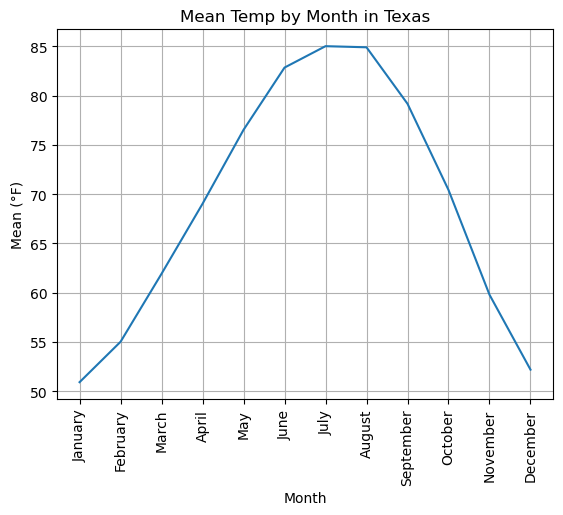

<Figure size 640x480 with 0 Axes>

In [11]:
plt.plot(df['Month'], df['Mean (°F)'])

plt.xlabel('Month')
plt.ylabel('Mean (°F)')
plt.title('Mean Temp by Month in Texas')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
plt.savefig('Images/mean_month_texas_temp.png', dpi= 300)